# Text Classification
## Spam Guard Classification(spam or ham)

In [1]:
import pandas as pd
import numpy as np

# libraries for document term Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting the data
from sklearn.model_selection import train_test_split

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Evaluating Metrics
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,f1_score,confusion_matrix

# Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
data = pd.read_table('sms.tsv', header=None, names=['label', 'message'])

In [3]:
print('No. of Rows:',data.shape[0])
print('No. of Columns:',data.shape[1])

No. of Rows: 5572
No. of Columns: 2


In [4]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# convert the target variable text to number just like encoding....
data['label_num'] = data['label'].map({'ham':0,'spam':1})

In [6]:
data.head(3)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [7]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
data['label_num'].value_counts()

0    4825
1     747
Name: label_num, dtype: int64

In [9]:
x = data['message']
y = data['label_num']

### Splitting the data in train and validating sets:

In [10]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=7)

In [11]:
# shape of train set
train_x.shape,train_y.shape

((4179,), (4179,))

In [12]:
# shape of validating set
test_x.shape,test_y.shape

((1393,), (1393,))

In [13]:
# to convert text data into dtm:
# use train_x to create vocabulary
# with created vocabulary get dtm for train_X
# with created vocabulary(train_x) , get dtm for test_x

## Vectorise text dataset:

In [14]:
tonumeric = CountVectorizer()

In [15]:
tonumeric.fit(train_x)
# create the document term matrix
train_x_dtm = tonumeric.transform(train_x)
train_x_dtm

<4179x7535 sparse matrix of type '<class 'numpy.int64'>'
	with 56144 stored elements in Compressed Sparse Row format>

In [16]:
# create the document term matrix
test_x_dtm = tonumeric.transform(test_x)
test_x_dtm

<1393x7535 sparse matrix of type '<class 'numpy.int64'>'
	with 16754 stored elements in Compressed Sparse Row format>

## Build and Evaluate the model:

In [17]:
def evaluate_models(model,train_x,test_x,train_y,test_y):
    mode = model
    mode.fit(train_x,train_y)
    pred = mode.predict(test_x)
    pred_prob = mode.predict_proba(test_x)[:,1]
    print('Precision:',precision_score(test_y,pred))
    print('Recall:',recall_score(test_y,pred))
    print('F1_Score:',f1_score(test_y,pred))
    print('Accuracy_score:',accuracy_score(test_y,pred))
    print('Auc_Roc:', roc_auc_score(test_y,pred_prob))
    print('Confusion Matrix:','\n',confusion_matrix(test_y,pred))

In [20]:
evaluate_models(model=GaussianNB(),train_x=train_x_dtm.toarray(),test_x=train_x_dtm.toarray(),train_y=train_y,test_y=train_y)

Precision: 0.7264397905759162
Recall: 1.0
F1_Score: 0.8415466262319938
Accuracy_score: 0.9499880354151711
Auc_Roc: 0.9711644591611479
Confusion Matrix: 
 [[3415  209]
 [   0  555]]


In [21]:
evaluate_models(model=GaussianNB(),train_x=train_x_dtm.toarray(),test_x=test_x_dtm.toarray(),train_y=train_y,test_y=test_y)

Precision: 0.5709677419354838
Recall: 0.921875
F1_Score: 0.7051792828685259
Accuracy_score: 0.8937544867193108
Auc_Roc: 0.9055669754371357
Confusion Matrix: 
 [[1068  133]
 [  15  177]]


* **Observations:**
* The Model has good performance on both test and train set.
* The recall score has improved,which is a better metric for us because we are classifying spam(positive).
* Precision and Auc Roc Score have reduced.

In [22]:
evaluate_models(model=LogisticRegression(),train_x=train_x_dtm.toarray(),test_x=train_x_dtm.toarray(),train_y=train_y,test_y=train_y)

Precision: 1.0
Recall: 0.9855855855855856
F1_Score: 0.9927404718693285
Accuracy_score: 0.998085666427375
Auc_Roc: 0.9998140524630591
Confusion Matrix: 
 [[3624    0]
 [   8  547]]


In [23]:
evaluate_models(model=LogisticRegression(),train_x=train_x_dtm.toarray(),test_x=test_x_dtm.toarray(),train_y=train_y,test_y=test_y)

Precision: 0.9659090909090909
Recall: 0.8854166666666666
F1_Score: 0.9239130434782609
Accuracy_score: 0.9798994974874372
Auc_Roc: 0.9951819664168748
Confusion Matrix: 
 [[1195    6]
 [  22  170]]


* **Observations:**
* The Model has good performance on both test and train set.
* The metrics have reduced but not significantly so we can say that model is generalised.

### Fine Tune Vectoriser:

In [24]:
tonumeric = CountVectorizer(stop_words='english')
tonumeric.fit(train_x)
len(tonumeric.get_feature_names_out())

7271

In [25]:
# include 1 and 2gram.....  
toNumeric = CountVectorizer(ngram_range=(1, 2))
toNumeric.fit(train_x)
len(toNumeric.get_feature_names_out())

41571

In [26]:
# Ignore terms that appear in more than 75% of the documents
toNumeric = CountVectorizer(max_df=0.75)
toNumeric.fit(train_x)
len(toNumeric.get_feature_names_out())

7535

In [27]:
# Keep terms that appear in at least 5 documents
toNumeric = CountVectorizer(min_df=2)
toNumeric.fit(train_x)
len(toNumeric.get_feature_names_out())

3527

### Visualization via Word Cloud:

In [28]:
data.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


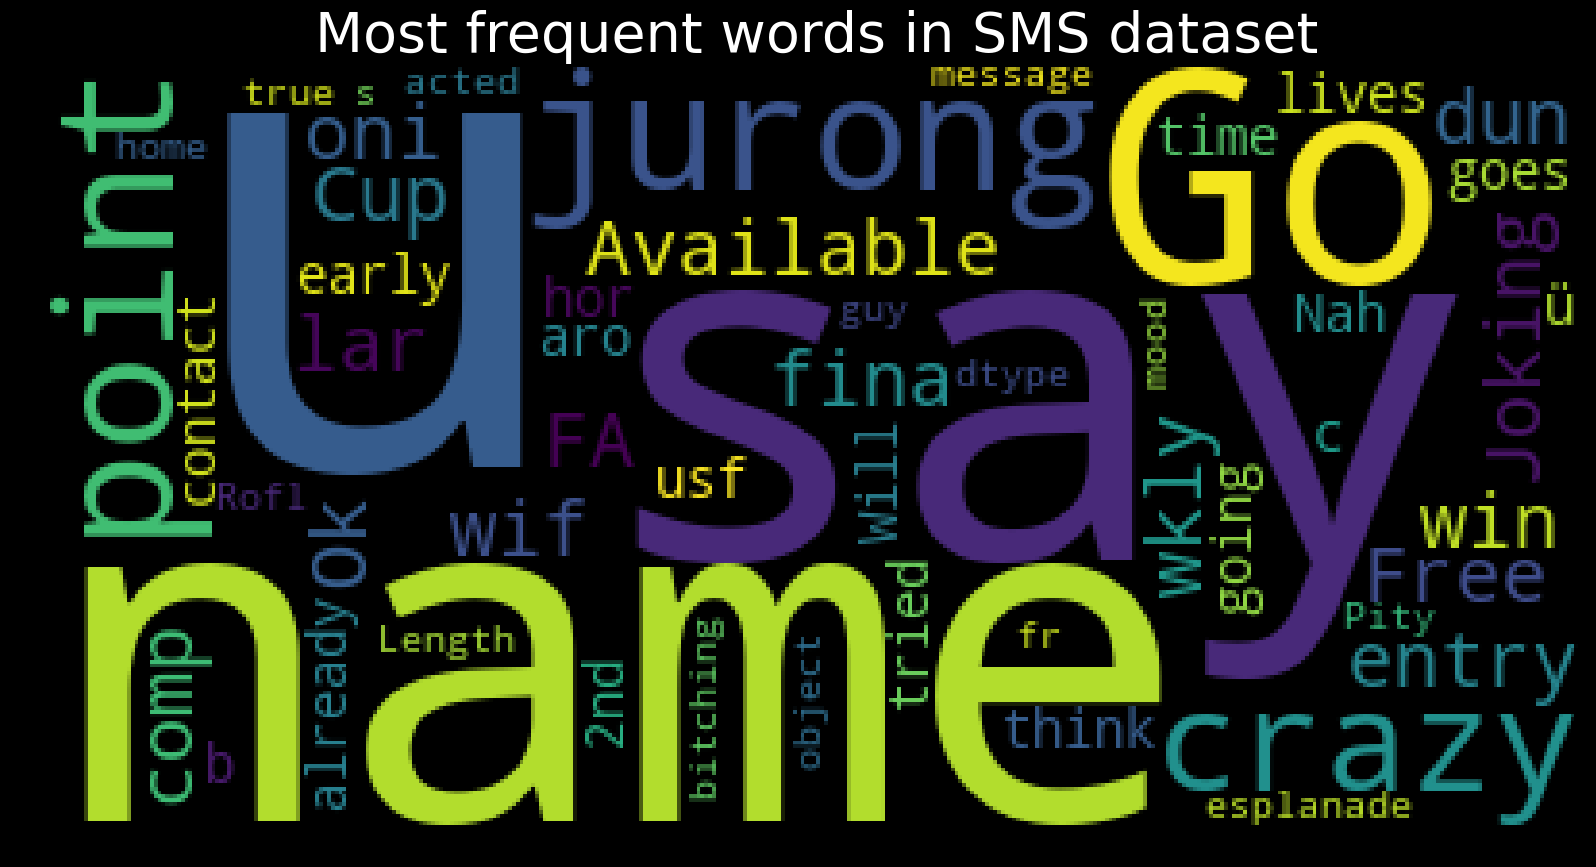

In [29]:
wc = WordCloud()
wc.generate(str(data['message']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words in SMS dataset", fontsize=40,color='white')
plt.imshow(wc)
plt.show()

### My First project of NLP.....
## Thank You
# END.....